In [18]:
import func
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy as sp
import glob

In [19]:
Nel = 32
input_folder = 'TrainingData'
groundtruth_folder = 'GroundTruths'
noise_level = 0.0001
categoryNbr = 1
z = (1e-6) * np.ones((Nel, 1))
error_system = 0.00001*func.system_error(groundtruth_folder, input_folder,categoryNbr, Nel, average_error = False)


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [ ]:
N_datapoints = 1
data_number = 1
Measurements = np.zeros((N_datapoints,76,31)).astype('float32')
sigmas = np.zeros((N_datapoints, 1, 256, 256)).astype('float32')
sigmas_true = np.zeros((N_datapoints, 1, 256, 256)).astype('float32')
mat_files = glob.glob(input_folder + '/data*.mat') # load the real data
mat_dict = sp.io.loadmat(input_folder + '/ref.mat')
mat_dict2 = sp.io.loadmat(mat_files[data_number-1])
Uelref = mat_dict["Uelref"]

Uel = mat_dict2["Uel"]

In [23]:


for i_dp in range(N_datapoints):
    Measurement, Measurement_nfree1, sigma_true1, sigma1 = func.GenerateMeasurement(input_folder,
    groundtruth_folder, noise_level, categoryNbr,error_system)
    Measurement1 = np.reshape(Measurement,(76,31))

    Measurement1 = Measurement1.astype('float32')
    sigma1 = sigma1.astype('float32')
    sigma_true1 = sigma_true1.astype('float32')

    Measurements[i_dp,:,:] = Measurement1
    Measurement1 = np.vstack(Measurement1)
    
    Measurement1 = np.reshape(Measurement1,(76*31,1))
    #Measurement1 = Measurement1[:,None]
    sigmas[i_dp,0,:,:] = func.apply_reconstruction(Measurement1, categoryNbr, Nel, input_folder, Uelref)
    sigmas_true[i_dp,0,:,:] = sigma_true1

with h5py.File('training_data1.h5', 'w') as hf:
    # Save the arrays to the file
    hf.create_dataset('measurements', data=Measurements)
    hf.create_dataset('sigmas', data=sigmas)
    hf.create_dataset('sigmas_true', data=sigmas_true)

(2356, 1)
(1602, 1)
(1602, 1)
(1602, 1)


(2356, 1)


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1602, 1)
(1602, 1)
(1602, 1)


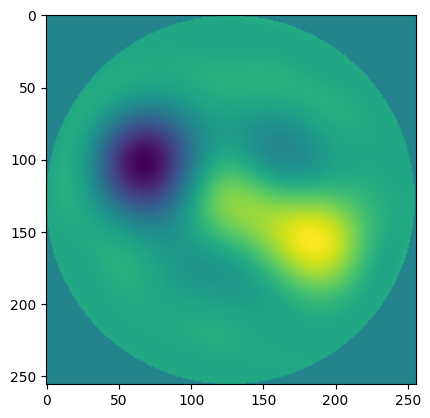

In [25]:
#plt.imshow(sigmas[0,0,:,:]); plt.colorbar(); plt.show()
#plt.imshow(sigmas_true[0,0,:,:]); plt.colorbar(); plt.show()
sigmas = func.apply_reconstruction(Uel, categoryNbr, Nel, input_folder, Uelref)

plt.imshow(sigmas)